In [49]:
def subsidize(money):
    sub = (money - 400)/3
    
    if sub > 400:
        sub = 400

    return sub

subsidize(1500)

366.6666666666667

In [50]:
def direct(day, fee=41.6):
    money = day * 2 * fee
    return money - subsidize(money)

direct(20)

1264.0

In [51]:
# MTR early bird discount: https://www.mtr.com.hk/ch/customer/main/early_bird.html
def early_bird(day, fee=41.6, rate=0.75):
    money = day * fee + day * fee * rate
    return money - subsidize(money)

early_bird(20)

1104.0

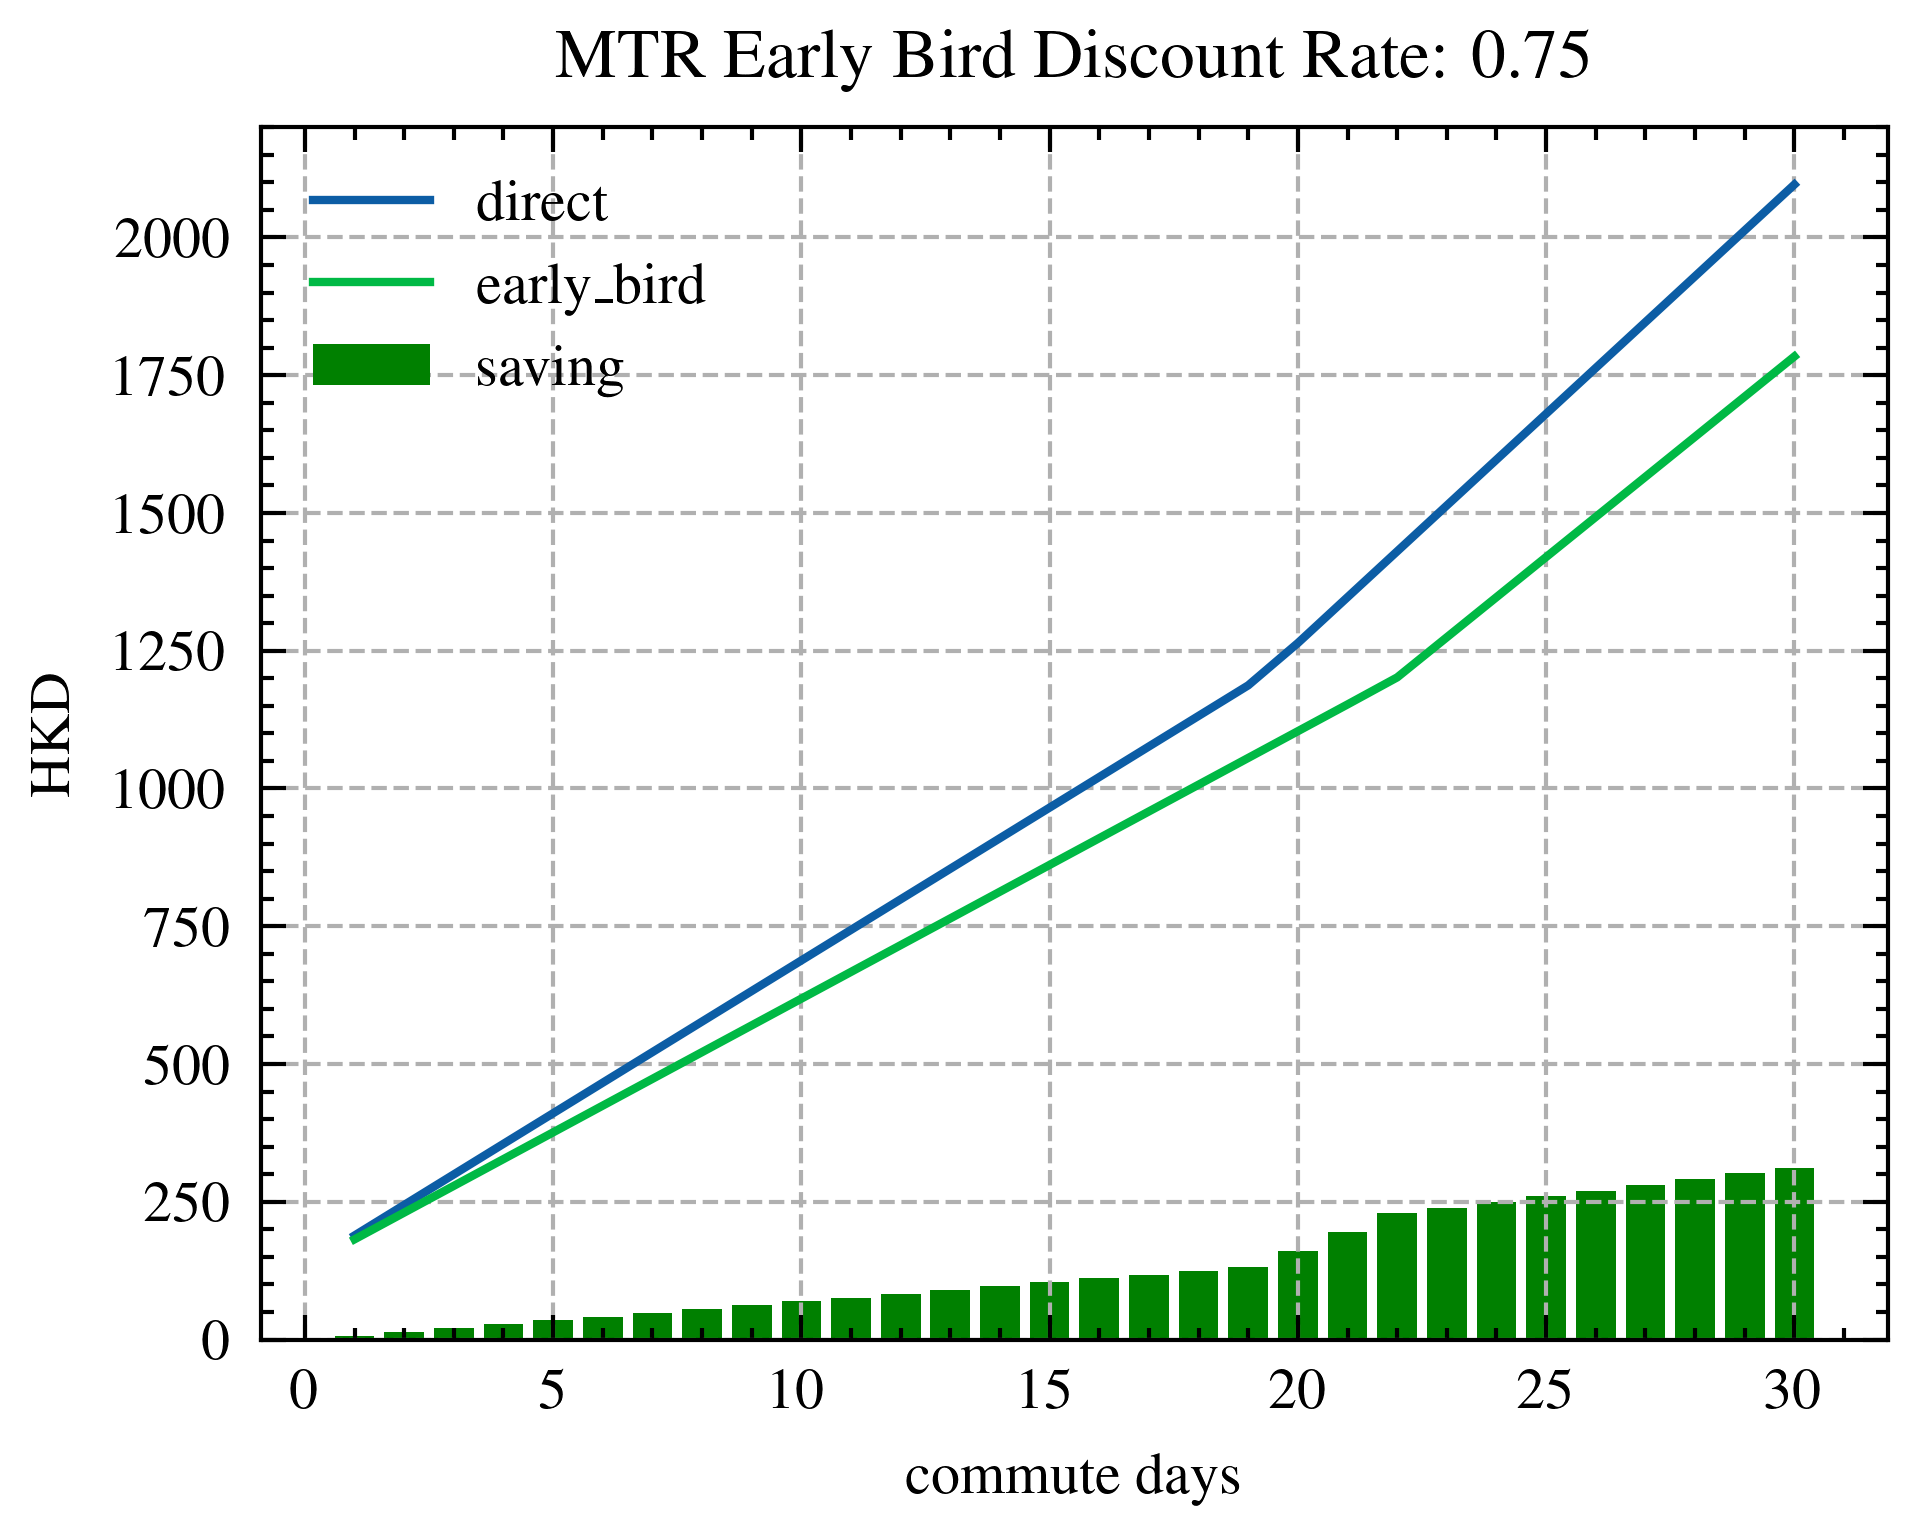

In [72]:
from matplotlib import pyplot as plt
import scienceplots
plt.style.use(['science'])

rate = 0.75

days = range(1, 31)
directs = [direct(day) for day in days]
early_birds = [early_bird(day, rate=rate) for day in days]
discounts = [direct(day) - early_bird(day, rate=rate) for day in days]

plt.plot(days, directs, label='direct')
plt.plot(days, early_birds, label='early_bird')
plt.bar(days, discounts, label='saving', color='g')

plt.grid(linestyle='--')
plt.title(f'MTR Early Bird Discount Rate: {rate}')
plt.xlabel('commute days')
plt.ylabel('HKD')
plt.legend()
plt.savefig(f'output/mtr-early-bird-{rate}.pdf')
plt.savefig(f'output/mtr-early-bird-{rate}.png')
plt.show()

In [53]:
print(discounts[8])

62.40000000000009
